In [206]:
#Importar librerias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap

In [207]:
#Importar datos
df = pd.read_excel('datos.xlsx')
df


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,1390,Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,6000,Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,25000,Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,11000,Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,4790,Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [208]:
#Ver las dimensiones del DataFrame
df.shape

(10000, 22)

In [209]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,1390,Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [210]:
# Categorizar las columnas necesarias
df = pd.get_dummies(df, columns = ['pets_allowed'])
df = pd.get_dummies(df, columns = ['has_photo'])
df = pd.get_dummies(df, columns = ['cityname'])
df = pd.get_dummies(df, columns = ['state'])
df = pd.get_dummies(df, columns = ['source'])
df = pd.get_dummies(df, columns = ['price_type'])

df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,price,...,source_RENTOCULAR,source_Real Estate Agent,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud,price_type_Monthly,price_type_Monthly|Weekly,price_type_Weekly
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,790,...,False,False,False,False,True,False,False,True,False,False
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,425,...,False,False,False,False,True,False,False,True,False,False
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,1390,...,False,False,False,False,True,False,False,True,False,False
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,925,...,False,False,False,False,True,False,False,True,False,False
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,880,...,False,False,False,False,True,False,False,True,False,False


In [211]:
#Categorizar la columna de amenities

# Reemplazar los valores nulos con "" y dividir los amenities en listas
df["amenities"] = df["amenities"].fillna("").str.split(",")

# Obtener el conjunto de todas las amenities únicas
amenities_unicas = set(amenity.strip() for sublist in df["amenities"] for amenity in sublist if amenity)

# Crear las nuevas columnas binarias para cada amenity
for amenity in amenities_unicas:
     df[amenity] = df["amenities"].apply(lambda x: 1 if amenity in [a.strip() for a in x] else 0)

# Eliminar la columna original de amenities
df.drop(columns=["amenities"], inplace=True)

df.head()

,id,category,title,body,bathrooms,bedrooms,currency,fee,price,price_display,...,Storage,Cable or Satellite,TV,View,Garbage Disposal,Elevator,Tennis,Luxury,Basketball,AC
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,0.0,USD,No,790,790,...,0,0,0,0,0,0,0,0,0,0
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,1.0,USD,No,425,425,...,0,0,0,0,0,0,0,0,0,0
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1.0,0.0,USD,No,1390,1390,...,0,0,0,0,0,0,0,0,0,0
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1.0,0.0,USD,No,925,925,...,0,0,0,0,0,0,0,0,0,0
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,0.0,USD,No,880,880,...,0,0,0,0,0,0,0,0,0,0


In [212]:
#Crear una columna adicional con el numero de caracteres que contiene la columna body
df['longitud_descripcion'] = df['body'].apply(lambda x: len(str(x)))
df

,id,category,title,body,bathrooms,bedrooms,currency,fee,price,price_display,...,Cable or Satellite,TV,View,Garbage Disposal,Elevator,Tennis,Luxury,Basketball,AC,longitud_descripcion
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,0.0,USD,No,790,790,...,0,0,0,0,0,0,0,0,0,183
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,1.0,USD,No,425,425,...,0,0,0,0,0,0,0,0,0,154
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1.0,0.0,USD,No,1390,1390,...,0,0,0,0,0,0,0,0,0,164
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1.0,0.0,USD,No,925,925,...,0,0,0,0,0,0,0,0,0,132
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,0.0,USD,No,880,880,...,0,0,0,0,0,0,0,0,0,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,4.0,5.0,USD,No,6000,6000,...,0,0,0,0,0,0,0,0,0,144
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",8.0,6.0,USD,No,25000,25000,...,0,0,0,0,0,0,0,0,0,139
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",8.5,6.0,USD,No,11000,11000,...,0,0,0,0,0,0,0,0,0,141
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...",NaN,1.0,USD,No,4790,4790,...,1,0,0,0,0,0,0,1,0,989


# EXPLORACIÓN DE LOS DATOS

In [213]:
# Estadísticas descrptivas
# Se calcula la media, mediana, desviación estándar, valores mínimos y máximos de variables numéricas
Estadisticas = df[["price", "bathrooms", "bedrooms", "square_feet"]].describe()
print("Estadísticas descriptivas de las variables numéricas:\n", Estadisticas)

Estadísticas descriptivas de las variables numéricas:
               price    bathrooms     bedrooms   square_feet
count  10000.000000  9966.000000  9993.000000  10000.000000
mean    1486.277500     1.380544     1.744021    945.810500
std     1076.507968     0.615410     0.942354    655.755736
min      200.000000     1.000000     0.000000    101.000000
25%      949.000000     1.000000     1.000000    649.000000
50%     1270.000000     1.000000     2.000000    802.000000
75%     1695.000000     2.000000     2.000000   1100.000000
max    52500.000000     8.500000     9.000000  40000.000000


In [214]:
# Número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')


Number of Missing Values: 3388


In [215]:
# Número de duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [216]:
#Se revisa que solo exista un tipo de moneda para poder comparar los precios directamente
df["currency"].unique()

array(['USD'], dtype=object)

In [217]:
df_duplicado = pd.read_excel('datos.xlsx')

### BOXPLOT - Presencia de foto vs Precio

/var/folders/fl/q4d2zbnn4f9d59whjf3fjk240000gn/T/ipykernel_35432/3964944408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_duplicado["has_photo"], y=df_duplicado["price"], palette='bright')


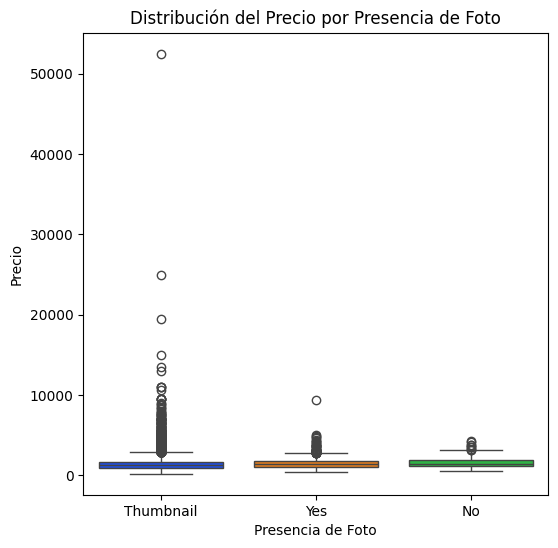

In [218]:
# Comparación de precios con y sin fotos
plt.figure(figsize=(6, 6))
sns.boxplot(x=df_duplicado["has_photo"], y=df_duplicado["price"], palette='bright')

plt.title("Distribución del Precio por Presencia de Foto")
plt.xlabel("Presencia de Foto")
plt.ylabel("Precio")
plt.show()

### MAPA DE CALOR - Amenities vs Precio

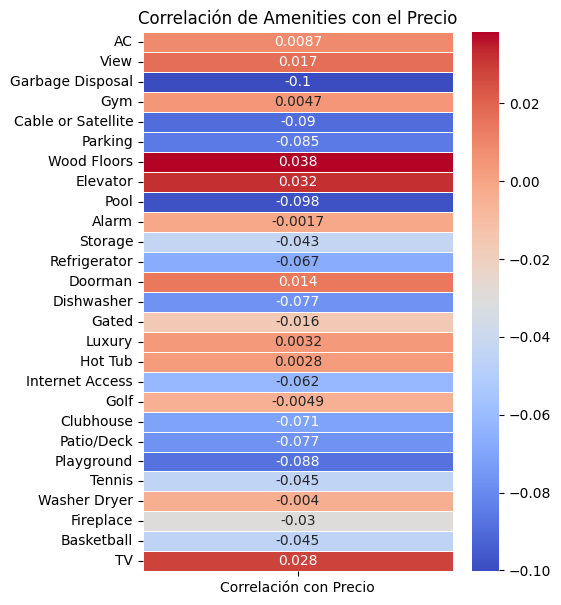

In [219]:
amenities = ["AC", "View", "Garbage Disposal", "Gym", "Cable or Satellite", "Parking", "Wood Floors", "Elevator", "Pool", "Alarm", "Storage", "Refrigerator",
             "Doorman", "Dishwasher", "Gated", "Luxury", "Hot Tub", "Internet Access", "Golf", "Clubhouse", "Patio/Deck", "Playground", "Tennis", "Washer Dryer",
             "Fireplace", "Basketball", "TV"] 

# Matriz de correlación entre precio y los amenities
df_amenities_corr = df[["price"] + amenities].corr().loc["price", amenities]

# Convertir en DataFrame
df_amenities_corr = df_amenities_corr.to_frame(name="Correlación con Precio")

# Mapa de calor de la correlacion entre precio y amenities
plt.figure(figsize=(5, 7))
sns.heatmap(df_amenities_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación de Amenities con el Precio")
plt.show()

In [220]:
# Crear una nueva columna que cuente la cantidad de amenities por apartamento
df["cantidad_amenities"] = df[list(amenities_unicas)].sum(axis=1)
df.head(6)

,id,category,title,body,bathrooms,bedrooms,currency,fee,price,price_display,...,TV,View,Garbage Disposal,Elevator,Tennis,Luxury,Basketball,AC,longitud_descripcion,cantidad_amenities
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,0.0,USD,No,790,790,...,0,0,0,0,0,0,0,0,183,0
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,1.0,USD,No,425,425,...,0,0,0,0,0,0,0,0,154,0
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1.0,0.0,USD,No,1390,1390,...,0,0,0,0,0,0,0,0,164,0
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1.0,0.0,USD,No,925,925,...,0,0,0,0,0,0,0,0,132,0
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,0.0,USD,No,880,880,...,0,0,0,0,0,0,0,0,163,0
5,5667891676,housing/rent/apartment,0 BR in New York NY 10019,**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...,1.0,0.0,USD,No,2475,2475,...,0,0,0,1,0,0,0,0,939,5


### GRAFICO DE DISPERSION CON LINEA DE TENDENCIA - Longitud de la descripcion en "Body" vs Precio

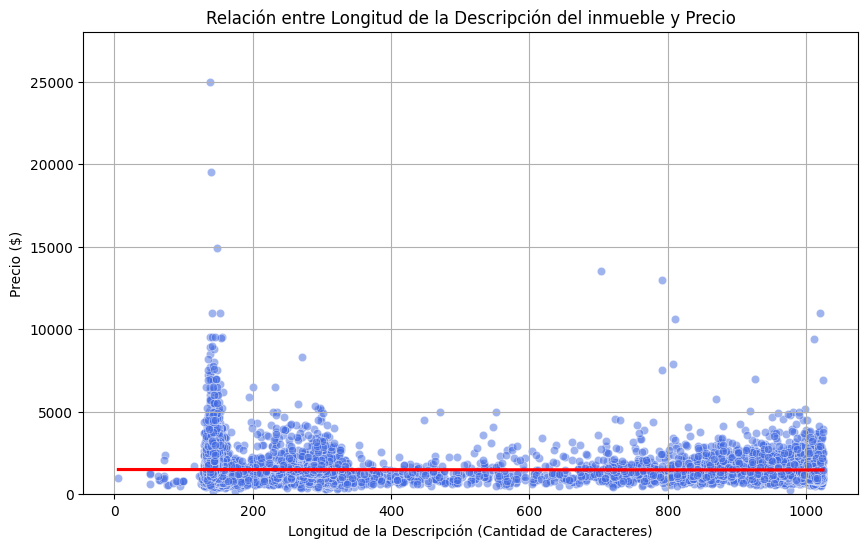

In [221]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitud_descripcion"], y=df["price"], alpha=0.5, color="royalblue")

# Agregar línea de tendencia
sns.regplot(x=df["longitud_descripcion"], y=df["price"], scatter=False, color="red")

plt.title("Relación entre Longitud de la Descripción del inmueble y Precio")
plt.xlabel("Longitud de la Descripción (Cantidad de Caracteres)")
plt.ylabel("Precio ($)")
plt.ylim(0, 28000)
plt.grid(True)
plt.show()

### GRAFICA DE BARRAS - Permiso de mascotas vs Precio

/var/folders/fl/q4d2zbnn4f9d59whjf3fjk240000gn/T/ipykernel_35432/3509260543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_duplicado["pets_allowed"], y=df_duplicado["price"], estimator=np.mean, palette="pastel")


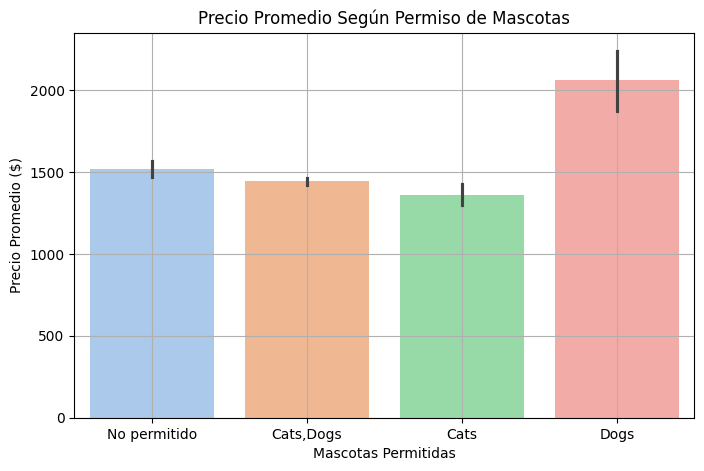

In [222]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_duplicado["pets_allowed"], y=df_duplicado["price"], estimator=np.mean, palette="pastel")

plt.title("Precio Promedio Según Permiso de Mascotas")
plt.xlabel("Mascotas Permitidas")
plt.ylabel("Precio Promedio ($)")
plt.grid(True)
plt.show()

### MAPA GEOGRAFICO DE CALOR - Ubicacion vs Precio

In [223]:
# Convertir latitud y longitud a valores numéricos y eliminar filas con valores nulos
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df_mapa = df.dropna(subset=["latitude", "longitude", "price"])

# Crear un mapa base centrado en la ubicación promedio
centro = [df_mapa["latitude"].mean(), df_mapa["longitude"].mean()]
mapa = folium.Map(location=centro, zoom_start=5)

heat_data = list(zip(df_mapa["latitude"], df_mapa["longitude"], df_mapa["price"]))

# Agregar capa de mapa de calor donde el precio afecta la intensidad del color
HeatMap(heat_data, radius=15, blur=5, max_zoom=5).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save("mapa_precios.html")
